Data Diri :



Nama Lengkap : Muhammad Fadli Ramadhan; Email : fadlinisasileader@gmail.com; Username : muhammadfadliramadha


In [ ]:
# Data Diri
# Nama Lengkap : Muhammad Fadli Ramadhan
# Username : muhammadfadliramadha
# Email : fadlinisasileader@gmail.com

In [ ]:
# Proyek Akhir : Klasifikasi Gambar 

# Kriteria Submission : 
# 1. Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
# 2. Dataset harus dibagi menjadi train set dan validation set.
# 3. Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
# 4. Harus mengimplementasikan augmentasi gambar.
# 5. Menggunakan image data generator.
# 6. Model harus menggunakan model sequential.
# 7. Pelatihan model tidak melebihi waktu 30 menit.
# 8. Program dikerjakan pada Google Colaboratory.
# 9. Akurasi dari model minimal 85%.
# 10. Dapat memprediksi gambar yang diunggah ke Colab 
# 11. Manambahkan data diri (sesuai profil Dicoding) pada submission/project yang dikirimkan.

In [2]:
# Langkah awal, periksa versi tensorflow pada google collabs, pastikan versi diatas 2.0
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
# Mengunduh file dataset pada Kriteria Submission menggunakan wget command yang tersedia pada resource
!wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \


--2021-04-29 09:20:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.68MB/s    in 60s     

2021-04-29 09:21:17 (5.17 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# Mengekstrak file .zip
import os                                                                         
import zipfile                                                                    

local_zip = '/content/rockpaperscissors.zip'                                      
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         
zip_ref.extractall('/content/')                                                   
zip_ref.close()      



In [6]:
# Membuat folder data gambar Gunting, batu dan kertas
import os
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')
fold_batu= os.path.join('/content/rockpaperscissors/rock')
fold_kertas = os.path.join('/content/rockpaperscissors/paper')

# Menampilkan Jumlah total gambar dan 3 nama file gambar
print('Jumlah total gambar gunting:', len(os.listdir(fold_gunting)))
print('Jumlah total gambar batu:', len(os.listdir(fold_batu)))
print('Jumlah total gambar kertas:', len(os.listdir(fold_kertas)))

print("Menampilkan nama file gambar:")
file_gunting = os.listdir(fold_gunting)
print("Gunting:",file_gunting[:3])

file_batu = os.listdir(fold_batu)
print("Batu:",file_batu[:3])

file_kertas = os.listdir(fold_kertas)
print("Kertas:",file_kertas[:3])    

Jumlah total gambar gunting: 750
Jumlah total gambar batu: 726
Jumlah total gambar kertas: 712
Menampilkan nama file gambar:
Gunting: ['bzQcSRVP3M7abinD.png', 'UDihI8vQDjvGJRjO.png', '2C9FEbBklwcVhF3W.png']
Batu: ['qMWVb6BibNukvVrj.png', 'EvmNpXcSU8y41PXX.png', 'Rc1dJyDnXnSjnpoH.png']
Kertas: ['djVVgBL6PqTdtr6l.png', 'tfMCcOsRUhEJZF6I.png', 'BLqL31aC5YLmx3uF.png']


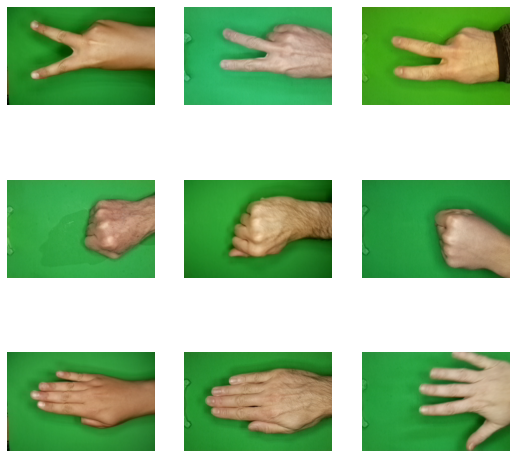

In [7]:
# Menampilakn gambar Gunting, Batu, dan Kertas dalam satu tampilan
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Mengatur output gambar matplotlim menjadi 3*3 gambar
nrows = 3
ncols = 3

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

# Indeks tambah bertambah 3 setiap baris
pic_index += 3
gbr_tampil_gunting = [os.path.join(fold_gunting, fname)
                      for fname in file_gunting[pic_index-3:pic_index]]
gbr_tampil_batu    = [os.path.join(fold_batu, fname)
                      for fname in file_batu[pic_index-3:pic_index]]
gbr_tampil_kertas  = [os.path.join(fold_kertas, fname)
                      for fname in file_kertas[pic_index-3:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_batu+gbr_tampil_kertas):
      sp = plt.subplot(nrows, ncols, i + 1)
      sp.axis('Off')

      img = mpimg.imread(img_path)
      plt.imshow(img)


In [8]:
# Mengimpor modul tensorflow, modul keras, keras_preprocessing untuk gambar, Image Generator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# Melakukan Augmentasi dan Pemisahan Data menjadi Training dan Validation
BASIS_DIR = "/content/rockpaperscissors/rps-cv-images/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,

# AUGMENTASI
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',

# Pemisahan Data menjadi Training dan Validation
      validation_split=0.4
      )

# Pelabelan data menggunakan Image Data Generator Berdasarkan Folder
# Generator data Training
train_generator = training_datagen.flow_from_directory(
  BASIS_DIR,
  target_size=(150,150),
  class_mode='categorical',
  shuffle=True,
  subset='training'
  )

# Generator data Validasi
validation_generator = training_datagen.flow_from_directory(
  BASIS_DIR,
  target_size=(150,150),
  class_mode='categorical',
  shuffle=True,
  subset='validation'
  )


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [10]:
# model yang digunakan adalah model Sequential
model = tf.keras.models.Sequential([
# Bentuk input adalah gambar dengan ukuran 150x150 dengan n 3 byte warna
# Layer konvolusi pertama
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

# Layer konvolusi kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

# Layer konvolusi ketiga
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

# Layer input Deep Learning Neural Network
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),

# Hiden Layer pertama dengan 128 neuron
    tf.keras.layers.Dense(128, activation='relu'),

# Hiden Layer kedua dengan 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),

# Layer Output
    tf.keras.layers.Dense(3, activation='softmax')
])

# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [15]:
# Melakukan kompilasi model
# Catatan : Di Run selama 3 kali agar Loss nya mereda dan akurasi meningkat !

# Loss function digunakan untuk klasifikasi kategori lebih dari 2
model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Langkah selanjutnya, Melatih model jaringan saraf tiruan
history=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=25,
    validation_data=validation_generator,   #Menampilkan akurasi pengujian data validasi
    validation_steps=4,
    verbose=2
    )

# Akurasinya membaik setelah 3 kali di RUN,


Epoch 1/25
4/4 - 5s - loss: 0.5660 - accuracy: 0.7959 - val_loss: 0.7264 - val_accuracy: 0.7188
Epoch 2/25
4/4 - 5s - loss: 0.4461 - accuracy: 0.8203 - val_loss: 0.4887 - val_accuracy: 0.8125
Epoch 3/25
4/4 - 5s - loss: 0.3938 - accuracy: 0.8281 - val_loss: 0.5311 - val_accuracy: 0.8203
Epoch 4/25
4/4 - 5s - loss: 0.5697 - accuracy: 0.7500 - val_loss: 0.3570 - val_accuracy: 0.8516
Epoch 5/25
4/4 - 5s - loss: 0.4518 - accuracy: 0.8125 - val_loss: 0.4167 - val_accuracy: 0.8359
Epoch 6/25
4/4 - 5s - loss: 0.4055 - accuracy: 0.8281 - val_loss: 0.5810 - val_accuracy: 0.7656
Epoch 7/25
4/4 - 5s - loss: 0.4177 - accuracy: 0.8438 - val_loss: 0.3961 - val_accuracy: 0.8281
Epoch 8/25
4/4 - 5s - loss: 0.5044 - accuracy: 0.7578 - val_loss: 0.5084 - val_accuracy: 0.8203
Epoch 9/25
4/4 - 5s - loss: 0.5162 - accuracy: 0.7656 - val_loss: 0.3461 - val_accuracy: 0.8906
Epoch 10/25
4/4 - 5s - loss: 0.4667 - accuracy: 0.7734 - val_loss: 0.3951 - val_accuracy: 0.8438
Epoch 11/25
4/4 - 5s - loss: 0.4000 - a

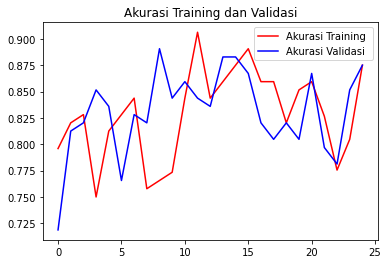

<Figure size 432x288 with 0 Axes>

In [16]:
# Saatnya Ploting Akurasi pada Training dan Validation
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ.png
04l5I8TqdzF9WDMJ.png
Tangan Ini Menunjukkan bentuk KERTAS


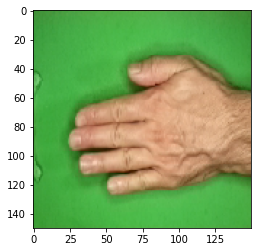

In [17]:
# Mengimpor modul numpy, 
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    if classes[0][0]==1:
      print('Tangan Ini Menunjukkan bentuk KERTAS')
    elif classes[0][1]==1:
      print('Tangan Ini Menunjukkan bentuk BATU')
    elif classes[0][2]==1:
      print('Tangan Ini Menunjukkan bentuk GUNTING')
    else:
      print('Tidak Diketahui')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

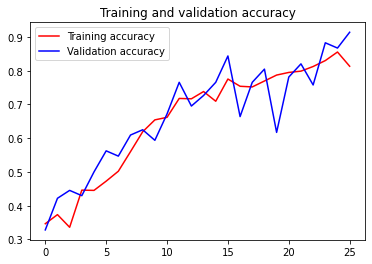

<Figure size 432x288 with 0 Axes>

In [18]:
# Program Klasifikasi Gambar dengan Kriteria Henti( CallBack )

# CALLBACK TRAINING MODEL
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
      self.model.stop_training = True

callbacks = myCallback()

# MEMBUAT MODEL LAGI
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

# MENGKOMPILASI MODEL YANG BARU
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# MELATIH MODEL YANG BARU
history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2,
    callbacks=[callbacks]
    )

# MEMBUAT PLOT AKURASI TRAINING DAN VALIDATION
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Total waktu yang dibutuhkan untuk semua proses Klasifikasi gambar mulai dari Mengecek versi Tensorflow sampai Callback dan model baru agar Akurasi training dan validasi 90 % adalah sekitar 21 menit 24 detik.
